In [263]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import impute
from sklearn.experimental import enable_iterative_imputer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [145]:
xl = pd.ExcelFile("./iris_Data.xls")
sheets = xl.sheet_names

dfs = [iris_original, iris_modified] = \
    list(map(lambda s: pd.read_excel("./iris_Data.xls",
        sheet_name=s, header=0), sheets))

# Exercice 1
## Traitement de iris_original

In [146]:
display(iris_original)
iris_original.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


_Il y a une colonne inutile à la position 0. On va donc la retirer des deux `DataFrame`._

In [147]:
list(map(lambda df: df.drop(columns=df.columns[0], inplace=True),
         dfs))

features_names = iris_original.columns[:-1]
target_name = iris_original.columns[-1]

features = iris_original[features_names]
target = iris_original[target_name]

### Normalisation

In [148]:
X_minMaxO = preprocessing.MinMaxScaler().fit_transform(features)
X_minMaxO

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Standardisation

In [149]:
X_standardO = preprocessing.StandardScaler().fit_transform(features)
X_standardO

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [150]:
X_robustO = preprocessing.RobustScaler().fit_transform(features)
X_robustO

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ],
       [-0.30769231,  1.4       , -0.81428571, -0.73333333],
       [-0.76923077,  0.8       , -0.78571429, -0.73333333],
       [-0.76923077,  0.        , -0.84285714, -0.8       ],
       [-1.15384615,  0.        , -0.92857143, -0.8       ],
       [ 0.        ,  2.        , -0.9       , -0.73333333],
       [-0.07692308,  2.8       , -0.81428571, -0.6       ],
       [-0.30769231,  1.

_Avec la normalisation, on conserve la distance proportionnelle entre les valeurs, qui se situent toutes entre 0 et 1. La standardisation, quant à elle, s'applique lorsque les variables suivent une loi normale. On transforme les données de telle sorte que la moyenne est centrée à 0 avec un écart-type de 1. La standardisation par la médiane suit le même principe, mais au lieu de retrancher la moyenne et diviser par l'écart-type, on retranche la médiane et on divise par l'écart inter-quartile._

## Traitement de iris_modified

### Normalisation

In [151]:
display(iris_modified)
iris_modified.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,10.0,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,150.000000,150.000000,150.000000
mean,5.835374,3.057333,3.758000,1.428667
std,0.825684,0.435866,1.765298,1.681017
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,15.000000


_On note que la moyenne et la médiane sont assez proches, par contre, si l'on regarde l'étendue, alors on remarque qu'il semble élevé pour `petal_length` et `petal_width`._

In [152]:
features_names = iris_modified.columns[:-1]
target_name = iris_modified.columns[-1]

features = iris_modified[features_names]
target = iris_modified[target_name]

In [153]:
X_minMaxM = preprocessing.MinMaxScaler().fit_transform(features)
X_minMaxM

array([[0.22222222, 0.625     , 0.06779661, 0.66442953],
       [0.16666667, 0.41666667, 0.06779661, 0.00671141],
       [0.11111111, 0.5       , 0.05084746, 0.00671141],
       [0.08333333, 0.45833333, 0.08474576, 0.00671141],
       [0.19444444, 0.66666667, 0.06779661, 0.00671141],
       [0.30555556, 0.79166667, 0.11864407, 0.02013423],
       [0.08333333, 0.58333333, 0.06779661, 0.01342282],
       [0.19444444, 0.58333333, 0.08474576, 0.00671141],
       [0.02777778, 0.375     , 0.06779661, 0.00671141],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [       nan, 0.70833333, 0.08474576, 0.00671141],
       [0.13888889, 0.58333333, 0.10169492, 0.00671141],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.00671141],
       [0.38888889, 1.        , 0.08474576, 0.02013423],
       [0.30555556, 0.79166667, 0.05084746, 0.02013423],
       [0.22222222, 0.625     ,

### Standardisation

In [154]:
X_standardM = preprocessing.StandardScaler().fit_transform(features)
X_standardM

array([[-0.89366925,  1.01900435, -1.34022653,  5.1159803 ],
       [-1.13672083, -0.13197948, -1.34022653, -0.7333555 ],
       [-1.37977242,  0.32841405, -1.39706395, -0.7333555 ],
       [-1.50129821,  0.09821729, -1.2833891 , -0.7333555 ],
       [-1.01519504,  1.24920112, -1.34022653, -0.7333555 ],
       [-0.52909188,  1.93979142, -1.16971425, -0.6139813 ],
       [-1.50129821,  0.78880759, -1.34022653, -0.6736684 ],
       [-1.01519504,  0.78880759, -1.2833891 , -0.7333555 ],
       [-1.74434979, -0.36217625, -1.34022653, -0.7333555 ],
       [-1.13672083,  0.09821729, -1.2833891 , -0.7930426 ],
       [        nan,  1.47939788, -1.2833891 , -0.7333555 ],
       [-1.25824663,  0.78880759, -1.22655167, -0.7333555 ],
       [-1.25824663, -0.13197948, -1.34022653, -0.7930426 ],
       [-1.86587558, -0.13197948, -1.51073881, -0.7930426 ],
       [-0.04298872,  2.16998818, -1.45390138, -0.7333555 ],
       [-0.16451451,  3.09077525, -1.2833891 , -0.6139813 ],
       [-0.52909188,  1.

In [155]:
X_robustM = preprocessing.RobustScaler().fit_transform(features)
X_robustM

array([[-0.53846154,  1.        , -0.84285714,  5.86440678],
       [-0.69230769,  0.        , -0.84285714, -0.77966102],
       [-0.84615385,  0.4       , -0.87142857, -0.77966102],
       [-0.92307692,  0.2       , -0.81428571, -0.77966102],
       [-0.61538462,  1.2       , -0.84285714, -0.77966102],
       [-0.30769231,  1.8       , -0.75714286, -0.6440678 ],
       [-0.92307692,  0.8       , -0.84285714, -0.71186441],
       [-0.61538462,  0.8       , -0.81428571, -0.77966102],
       [-1.07692308, -0.2       , -0.84285714, -0.77966102],
       [-0.69230769,  0.2       , -0.81428571, -0.84745763],
       [        nan,  1.4       , -0.81428571, -0.77966102],
       [-0.76923077,  0.8       , -0.78571429, -0.77966102],
       [-0.76923077,  0.        , -0.84285714, -0.84745763],
       [-1.15384615,  0.        , -0.92857143, -0.84745763],
       [ 0.        ,  2.        , -0.9       , -0.77966102],
       [-0.07692308,  2.8       , -0.81428571, -0.6440678 ],
       [-0.30769231,  1.

_Avec la normalisation, on conserve la distance proportionnelle entre les valeurs, qui se situent toutes entre 0 et 1. La standardisation, quant à elle, s'applique lorsque les variables suivent une loi normale. On transforme les données de telle sorte que la moyenne est centrée à 0 avec un écart-type de 1. La standardisation par la médiane suit le même principe, mais au lieu de retrancher la moyenne et diviser par l'écart-type, on retranche la médiane et on divise par l'écart inter-quartile._

In [172]:
X_minMaxO = pd.DataFrame(X_minMaxO, columns=features_names)
X_minMaxO["label"] = "original"

X_minMaxM = pd.DataFrame(X_minMaxM, columns=features_names)
X_minMaxM["label"] = "modified"
minMax_compare = pd.concat([X_minMaxO,X_minMaxM]).reset_index(drop=True)
minMax_compare

,sepal_length,sepal_width,petal_length,petal_width,label
0,0.222222,0.625000,0.067797,0.041667,original
1,0.166667,0.416667,0.067797,0.041667,original
2,0.111111,0.500000,0.050847,0.041667,original
3,0.083333,0.458333,0.084746,0.041667,original
4,0.194444,0.666667,0.067797,0.041667,original
...,...,...,...,...,...
295,0.666667,0.416667,0.711864,0.147651,modified
296,0.555556,0.208333,0.677966,0.120805,modified
297,0.611111,0.416667,0.711864,0.127517,modified
298,0.527778,0.583333,0.745763,0.147651,modified


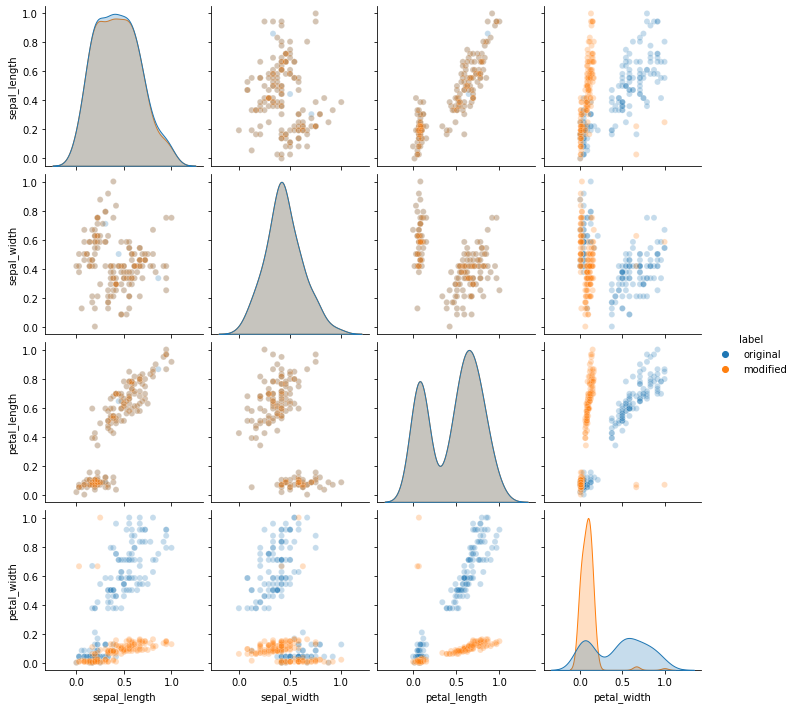

In [176]:
sns.pairplot(minMax_compare, hue="label", plot_kws=dict(alpha=0.25))
None

_On remarque que la normalisation pénalise énormément les données "régulières" lors de la présence de valeurs extrêmes. En effet, puisque celle-ci est basée sur l'étendue, alors toutes les valeurs non-aberrantes se retrouvent coincées dans un petit intervalle. Par exemple, pour `petal_width`, toutes, sauf deux valeurs, semblent se trouver entre 0 et 0.25 pour garder la distance relative avec les données aberrantes, ce qui rend difficile l'analyse graphique._

In [174]:
X_standardO = pd.DataFrame(X_standardO, columns=features_names)
X_standardO["label"] = "original"

X_standardM = pd.DataFrame(X_standardM, columns=features_names)
X_standardM["label"] = "modified"
standard_compare = pd.concat([X_standardO,X_standardM]).reset_index(drop=True)
standard_compare

,sepal_length,sepal_width,petal_length,petal_width,label
0,-0.900681,1.019004,-1.340227,-1.315444,original
1,-1.143017,-0.131979,-1.340227,-1.315444,original
2,-1.385353,0.328414,-1.397064,-1.315444,original
3,-1.506521,0.098217,-1.283389,-1.315444,original
4,-1.021849,1.249201,-1.340227,-1.315444,original
...,...,...,...,...,...
295,1.050743,-0.131979,0.819596,0.520074,modified
296,0.564640,-1.282963,0.705921,0.281325,modified
297,0.807692,-0.131979,0.819596,0.341012,modified
298,0.443114,0.788808,0.933271,0.520074,modified


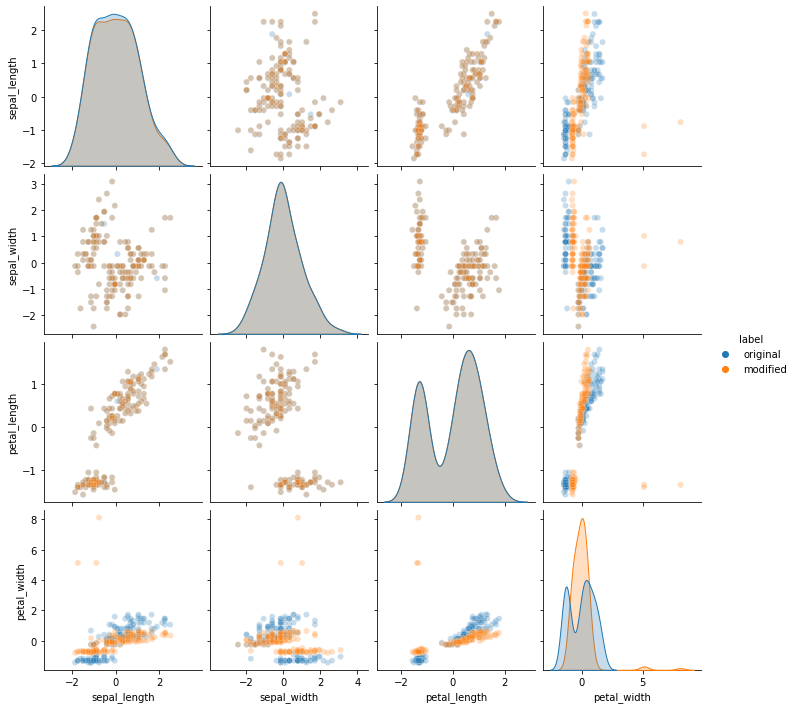

In [177]:
sns.pairplot(standard_compare, hue="label", plot_kws=dict(alpha=0.25))
None

_Il y a une grande amélioration comparativement à la normalisation. L'écart entre les nuages de points est moindre, ce qui montre une plus grande robustesse aux valeurs extrême._

In [178]:
X_robustO = pd.DataFrame(X_robustO, columns=features_names)
X_robustO["label"] = "original"

X_robustM = pd.DataFrame(X_robustM, columns=features_names)
X_robustM["label"] = "modified"
robust_compare = pd.concat([X_robustO,X_robustM]).reset_index(drop=True)
robust_compare

,sepal_length,sepal_width,petal_length,petal_width,label
0,-0.538462,1.0,-0.842857,-0.733333,original
1,-0.692308,0.0,-0.842857,-0.733333,original
2,-0.846154,0.4,-0.871429,-0.733333,original
3,-0.923077,0.2,-0.814286,-0.733333,original
4,-0.615385,1.2,-0.842857,-0.733333,original
...,...,...,...,...,...
295,0.692308,0.0,0.242857,0.644068,modified
296,0.384615,-1.0,0.185714,0.372881,modified
297,0.538462,0.0,0.242857,0.440678,modified
298,0.307692,0.8,0.300000,0.644068,modified


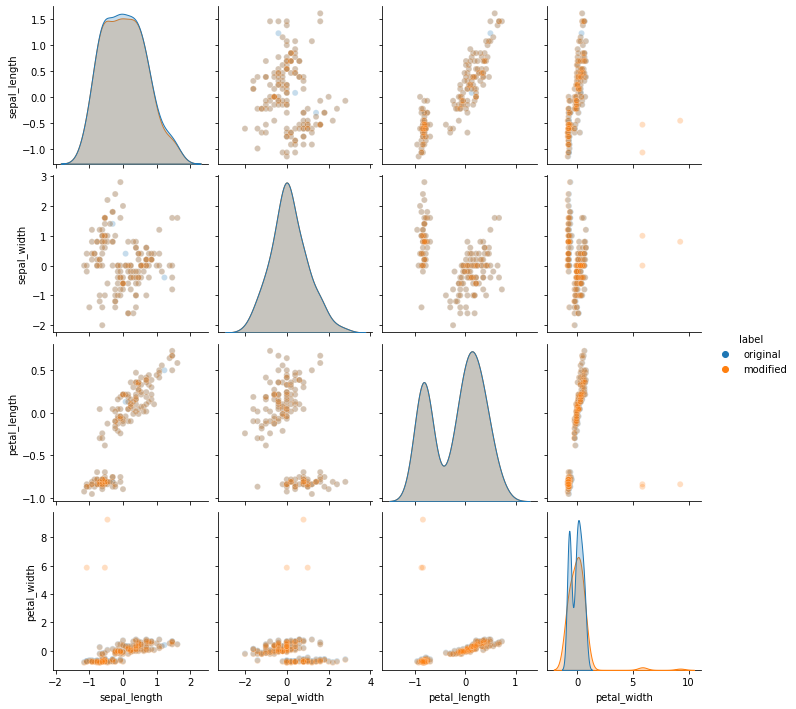

In [179]:
sns.pairplot(robust_compare, hue="label", plot_kws=dict(alpha=0.25))
None

_Les nuages de points semblent se superposer parfaitement. La force de la standardisation par la médiane est qu'elle n'est justement __pas__ affectée pas les valeurs aberrantes, donc qu'il y ait présence ou non de ces valeurs, la standardisation donne le même résultat, contrairement à la standardisation classique, basée sur la moyenne, qui est sensible à ces valeurs._

# Exercice 2
## Approche analyse graphique

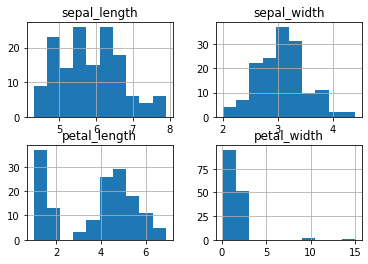

In [181]:
iris_modified.hist()
None

_On voit, sur l'histogramme, que pour petal_width, il y a deux valeurs sortant du lot, soit 10 et 15._

## Approche selon la distance interquartile

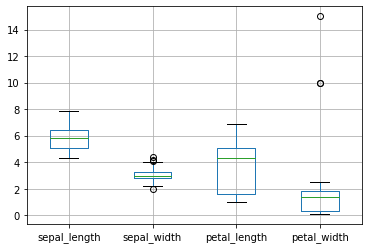

In [200]:
iris_modified.boxplot()
None

In [202]:
iris_modified.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,150.000000,150.000000,150.000000
mean,5.835374,3.057333,3.758000,1.428667
std,0.825684,0.435866,1.765298,1.681017
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,15.000000


In [234]:
IQRs = list(map(lambda feature:
    iris_modified[feature].quantile(0.75) - iris_modified[feature].quantile(0.25),
                features_names))

intervals = list(map(lambda feature, IQR:
    [iris_modified[feature].quantile(0.25) - 1.5 * IQR,
     iris_modified[feature].quantile(0.75) + 1.5 * IQR],
                     features_names, IQRs))

display(intervals)

for i in range(len(intervals)):
    display(iris_modified[~(iris_modified[features_names[i]].between(
    intervals[i][0], intervals[i][1], inclusive=True))])

[[3.1499999999999986, 8.350000000000001],
 [2.05, 4.05],
 [-3.649999999999999, 10.349999999999998],
 [-1.8875000000000004, 4.0125]]

,sepal_length,sepal_width,petal_length,petal_width,species
10,NaN,3.7,1.5,0.2,setosa
70,NaN,3.2,4.8,1.8,versicolor
130,NaN,2.8,6.1,1.9,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


,sepal_length,sepal_width,petal_length,petal_width,species


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,10.0,setosa
28,5.2,3.4,1.4,15.0,setosa
38,4.4,3.0,1.3,10.0,setosa


_Dans le premier tableau on voit qu'il ne reste que des individus ayant des valeurs manquantes pour `sepal_length`. Pour `sepal_width`, nous avons 4 valeurs aberrantes, une en dessous de la limite et 3 au dessus, mais on voit que les bornes sont [2.05, 4.05], donc elles sont très près des bornes. Nous avons aucune valeur aberrante pour `petal_length` et les 3 valeurs aberrantes introduites dans le jeu de données pour `petal_width`._

## Approche selon le score Z

In [242]:
z2 = 2
z3 = 3
def add(x, y): return x+y
def sub(x, y): return x-y
    
for feature in features_names:
    moyenne = iris_modified[feature].mean()
    ecartType = iris_modified[feature].std()

    # Les 2 premières valeurs du tableau sont celles de z2, les 2 dernières z3
    cartesian_product = itertools.product([z2, z3], [sub, add])
    bounds = list(map(lambda z_op: z_op[1](moyenne, z_op[0] *
                                           ecartType), cartesian_product))

    outliers_z2 = iris_modified[(iris_modified[feature] < bounds[0]) | (iris_modified[feature] > bounds[1])]
    outliers_z3 = iris_modified[(iris_modified[feature] < bounds[2]) | (iris_modified[feature] > bounds[3])]
    print("Outiers avec un score Z de 2 et 3 respectivement pour", feature)
    display(outliers_z2)
    display(outliers_z3)


Outiers avec un score Z de 2 et 3 respectivement pour sepal_length


,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width,species


Outiers avec un score Z de 2 et 3 respectivement pour sepal_width


,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa


Outiers avec un score Z de 2 et 3 respectivement pour petal_length


,sepal_length,sepal_width,petal_length,petal_width,species


,sepal_length,sepal_width,petal_length,petal_width,species


Outiers avec un score Z de 2 et 3 respectivement pour petal_width


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,10.0,setosa
28,5.2,3.4,1.4,15.0,setosa
38,4.4,3.0,1.3,10.0,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,10.0,setosa
28,5.2,3.4,1.4,15.0,setosa
38,4.4,3.0,1.3,10.0,setosa


_On remarque que cette fois-ci les valeurs manquantes n'aparaissent pas dans les tableaux. C'est en raison de la méthode utilisée pour aller chercher les valeurs n'appartenant pas dans l'intervalle. Du reste, on peut noter qu'avec un score Z = 2, il y a beaucoup plus d'outliers puisque l'intervalle est plus petit. Si l'on compare avec la méthode par l'approche selon l'écart interquartille, on peut dire que cette dernière, au niveau de la sévérité, se situe entre un Z = 2 et Z = 3._

# Exercice 3

## imputation par valeur statistique

In [257]:
missing_values = iris_modified[iris_modified.isna().any(axis=1)].index

display(iris_modified.iloc[missing_values])
display(iris_original.iloc[missing_values])

,sepal_length,sepal_width,petal_length,petal_width,species
10,NaN,3.7,1.5,0.2,setosa
70,NaN,3.2,4.8,1.8,versicolor
130,NaN,2.8,6.1,1.9,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
70,5.9,3.2,4.8,1.8,versicolor
130,7.4,2.8,6.1,1.9,virginica


_Le premier tableau repésente les valeurs manquante de `iris_modified`, alors que le deuxième contient les vraies valeurs. Puisqu'il s'agit d'une variable quantitative, on peut remplacer soit par la médiane ou la moyenne pour une imputation par valeur statistique. Malheuresement on ne peut pas faire une imputation par la règle._

In [289]:
mean_imputer = impute.SimpleImputer(strategy="mean")
median_imputer = impute.SimpleImputer(strategy="median")

mean_repaired = pd.DataFrame(mean_imputer.fit_transform(iris_modified[features_names]), columns = features_names)
mean_imputed = mean_repaired.sepal_length.iloc[missing_values]
display(mean_imputed)

median_repaired = pd.DataFrame(median_imputer.fit_transform(iris_modified[features_names]), columns = features_names)
median_imputed = median_repaired.sepal_length.iloc[missing_values]
display(median_imputed)

10     5.835374
70     5.835374
130    5.835374
Name: sepal_length, dtype: float64

10     5.8
70     5.8
130    5.8
Name: sepal_length, dtype: float64

_La valeur de la moyenne et de la médiane sont très proches, donc il n'y a pas vraiment d'intérêt à utiliser l'une plus que l'autre. Si l'on compare aux valeurs réelles, alors elles sont très réaliste. C'est seulement pour la dernière valeur manquante (ligne 130) que l'estimation est moins bonne._

## Imputation par les k plus proches voisins

In [290]:
knn_imputer = impute.KNNImputer()

knn_repaired = pd.DataFrame(knn_imputer.fit_transform(iris_modified[features_names]), columns = features_names)
knn_imputed = knn_repaired.sepal_length.iloc[missing_values]
display(knn_imputed)

10     5.08
70     6.36
130    7.20
Name: sepal_length, dtype: float64

_Les valeurs remplacées se moulent davantages aux vraies valeurs en raison de l'imputation "intelligente" en fonction des vecteurs les plus proches de chaque vecteur avec une donnée manquante._

## Imputation itérative

In [291]:
iterative_imputer = impute.IterativeImputer()

iterative_repaired = pd.DataFrame(iterative_imputer.fit_transform(iris_modified[features_names]), columns = features_names)
iterative_imputed = iterative_repaired.sepal_length.iloc[missing_values]
display(iterative_imputed)

10     5.156342
70     6.412683
130    6.790189
Name: sepal_length, dtype: float64

_Les valeurs collent aussi bien aux données réelles grâce à la flexibilité fournie par l'imputation itérative._

## Comparaison

In [296]:
compare_board = pd.DataFrame()

compare_board["original"] = iris_original["sepal_length"].iloc[missing_values]
compare_board["mean"] = compare_board["original"] - mean_imputed
compare_board["median"] = compare_board["original"] - median_imputed
compare_board["knn"] = compare_board["original"] - knn_imputed
compare_board["iterative"] = compare_board["original"] - iterative_imputed

display(compare_board)
compare_board[compare_board.columns[1:]].sum()

,original,mean,median,knn,iterative
10,5.4,-0.435374,-0.4,0.32,0.243658
70,5.9,0.064626,0.1,-0.46,-0.512683
130,7.4,1.564626,1.6,0.20,0.609811


mean         1.193878
median       1.300000
knn          0.060000
iterative    0.340787
dtype: float64

_Si l'on regarde la somme des distances pour chaque méthode, alors celle ayant le mieux fonctionné est __knn__, suivi de __iterative__ . Ce n'est pas étonnant puisque ce sont celles qui sont le moins rigide, statiques; l'imputation par valeur statistique donne la même valeur à tous les individus, peu importe le contenu de son vecteur de caractéristiques._